# 多项式回归 Polynomial Regression
## 算法实现 implementation of algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### 数据集 Dataset

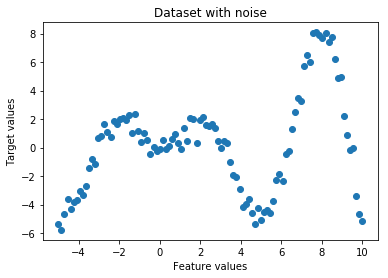

In [2]:
X = np.linspace(-5, 10, 100)
y = X * np.sin(X) + np.random.randn(100) * 0.5
X_train, X_test, y_train, y_test = train_test_split(X, y)

plt.scatter(X, y)
plt.title("Dataset with noise")
plt.xlabel("Feature values")
plt.ylabel("Target values")
plt.show()

In [3]:
class PolynomialRegression():
    def __init__(self):
        self.theta = None
    
    def fit(self, X_train, y_train, degree):
        if X_train.ndim == 1:
            X_train.shape = (-1,1)
        n_samples, n_features = X_train.shape
        X_b = np.hstack([np.ones((n_samples, 1)), X_train])
        for i in range(1, degree):
            X_b = np.hstack([X_b,np.power(X_train,i)])       
        self.theta = np.linalg.lstsq((X_b.T.dot(X_b)), (X_b.T).dot(y_train), rcond=-1)[0]
        return self.theta
    
    def predict(self, X_test, degree):
        if X_test.ndim == 1:
            X_test.shape = (-1,1)
        n_samples, n_features = X_test.shape
        X_b = np.hstack([np.ones((n_samples, 1)), X_test])
        for i in range(1, degree):
            X_b = np.hstack([X_b,np.power(X_test,i)])
        return X_b.dot(self.theta)
    
    def mean_squared_error(self, y, y_hat):
        return np.sum((y - y_hat)**2) / len(y)
    
    def score(self, X_test, y, degree):
        y_p = self.predict(X_test, degree)
        return 1 - self.mean_squared_error(y, y_p)/np.var(y)

### 测试 Testing

In [4]:
reg = PolynomialRegression()
theta = reg.fit(X_train, y_train, degree=9)
reg.score(X_test, y_test, degree=9)

0.9513661853910977

### 预测可视化 Visualize Result

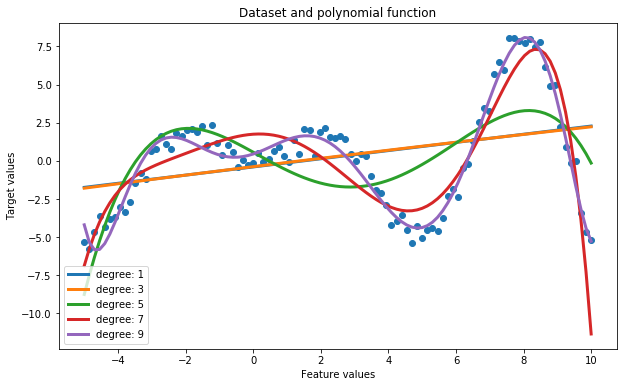

In [5]:
plt.figure(figsize=(10,6))
plt.scatter(X, y)
X_v = np.linspace(-5,10,100)
for i in range(1,10,2):
    reg.fit(X_train, y_train,i)
    y_v = reg.predict(X_v, i)
    plt.plot(X_v, y_v, '-', label=f'degree: {i}', linewidth=3)
plt.title("Dataset and polynomial function")
plt.xlabel("Feature values")
plt.ylabel("Target values")
plt.legend(loc='lower left')
plt.show()

## scikit-learn

In [6]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import warnings; warnings.simplefilter('ignore')

In [7]:
model = make_pipeline(PolynomialFeatures(9), Ridge())
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.9572352865717663

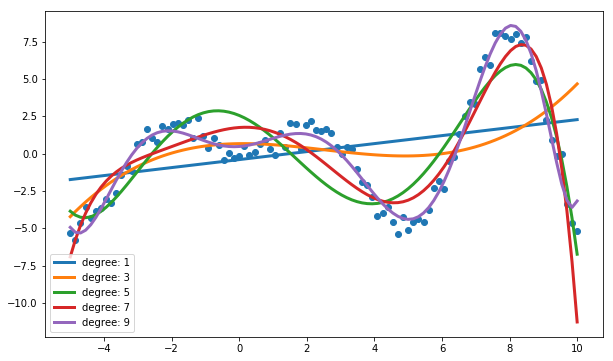

In [8]:
plt.figure(figsize=(10,6))
plt.scatter(X, y)
X_v = np.linspace(-5,10,100)
X_v = X_v[:,np.newaxis]
for degree in range(1,10,2):
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(X_train, y_train)
    y_plot = model.predict(X_v)
    plt.plot(X_v, y_plot, linewidth=3, label=f"degree: {degree}")

plt.legend(loc='lower left')
plt.show()